# Capstone Study Region - Colorado

## Jacquelyn Witte

### For the presentation pitch this notebook outlines the study region and data highlights using the NASA Global Landslide Catalog provided by Elsa Culler - CU

In [1]:
import os

import earthpy as et
import folium
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from geopandas import GeoDataFrame
from shapely.geometry import Point

import warnings
warnings.filterwarnings('ignore')

sns.set(font_scale=1.2, style="whitegrid")

In [2]:
# Change to data directory
data_dir = os.path.join(et.io.HOME,
                        'earth-analytics',
                        'data')
os.chdir(data_dir)

glc_file = os.path.join('capstone', 'landslide', 'nasa.glc.export.csv')
# glc_file = os.path.join('capstone', 'landslide', 'GLC03122015.csv')
os.path.exists(glc_file)

True

In [3]:
# Read the file
glc = pd.read_csv(glc_file)

glc_co = glc[(glc['country_code'] == 'US') 
             & (glc['admin_division_name'] == 'Colorado') 
             & (glc['landslide_trigger'] != 'freeze_thaw') 
             & (glc['landslide_trigger'] != 'snowfall_snowmelt') 
             & (glc['landslide_trigger'] != 'earthquake') 
             & (glc['landslide_trigger'] != 'leaking_pipe') 
             & (glc['landslide_trigger'] != 'no_apparent_trigger') 
             & (glc['landslide_trigger'] != 'other')              
             & (glc['landslide_trigger'] != 'unknown')
            ]

# covert to datetime
glc_co['date'] = pd.to_datetime(glc_co['event_date'])
glc_co = glc_co.set_index('date').sort_index()
glc_co.shape

(116, 31)

In [4]:
print(glc_co['latitude'].isna().any())
print(glc_co['longitude'].isna().any())

False
False


In [5]:
glc_co['landslide_trigger']

date
2007-08-14 00:00:00        rain
2007-09-06 00:00:00        rain
2007-09-17 00:00:00        rain
2008-04-13 00:00:00        rain
2008-05-28 00:00:00        rain
                         ...   
2016-07-20 14:30:00    downpour
2016-07-20 14:30:00    downpour
2016-07-20 14:30:00    downpour
2016-08-07 00:00:00        rain
2016-08-07 00:00:00    downpour
Name: landslide_trigger, Length: 116, dtype: object

In [6]:
glc_co_gt2015 = glc_co[glc_co.index > '2015-04-01']

In [7]:
glc_co_gt2015

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
date,,,,,,,,,,,,,,,,,,,,,
2015-04-27 00:00:00,Steamboat Today,http://www.steamboattoday.com/news/2015/jun/12...,6994,4/27/15 0:00,NaN,Howelsen Hill,The work will involve repositioning the chairl...,Howelsen Hill,1km,landslide,...,US,Colorado,12088.0,Steamboat Springs,0.83297,3/24/16 17:17,11/20/17 15:17,2/15/18 15:51,-106.8393,40.4802
2015-05-11 00:00:00,ABC7,http://www.thedenverchannel.com/news/local-new...,7047,5/11/15 0:00,NaN,"Wyoming Circle, Golden",The soil on North Table Mountain is so saturat...,"Wyoming Circle, Golden",exact,mudslide,...,US,Colorado,18867.0,Golden,2.66154,7/2/15 14:21,11/20/17 15:17,2/15/18 15:51,-105.2274,39.7790
2015-05-13 00:00:00,KKTV 11,http://www.kktv.com/home/headlines/Homeowners-...,7060,5/13/15 0:00,NaN,"6250 Fencerail Hts Colorado Springs, CO",The almost nonstop rain last week and over the...,"6250 Fencerail Hts Colorado Springs, CO",exact,landslide,...,US,Colorado,6680.0,Air Force Academy,8.38116,7/2/15 18:54,11/20/17 15:17,2/15/18 15:51,-104.8365,38.9218
2015-05-19 00:00:00,Fox 21 News,http://fox21news.com/2015/05/21/rock-slide-and...,7052,5/19/15 0:00,NaN,Phantom Canyon Road,“Our road crews went further up Phantom Canyon...,Phantom Canyon Road,10km,landslide,...,US,Colorado,3582.0,Penrose,15.46134,7/2/15 16:21,11/20/17 15:17,2/15/18 15:51,-105.0973,38.5514
2015-05-19 00:00:00,Wet Mountain Tribune,http://www.wetmountaintribune.com/home.asp?i=8...,7051,5/19/15 0:00,NaN,"Mile Marker 10, Oak Creek Grade Road",A severe mudslide closed Oak Creek Grade on Tu...,"Mile Marker 10, Oak Creek Grade Road",5km,mudslide,...,US,Colorado,3546.0,Lincoln Park,15.35824,7/2/15 16:06,11/20/17 15:17,2/15/18 15:51,-105.2706,38.2967
2015-05-19 00:00:00,Fox 21 News,http://fox21news.com/2015/05/21/rock-slide-and...,7053,5/19/15 0:00,NaN,Phantom Canyon Road,“Our road crews went further up Phantom Canyon...,Phantom Canyon Road,10km,landslide,...,US,Colorado,3582.0,Penrose,15.49683,7/2/15 16:23,11/20/17 15:17,2/15/18 15:51,-105.0948,38.5526
2015-05-21 00:00:00,KKTV 11 News,http://www.kktv.com/home/headlines/Saturated-G...,7048,5/21/15 0:00,NaN,A-1 Mobile Park,According to the Colorado Springs Fire Departm...,A-1 Mobile Park,1km,mudslide,...,US,Colorado,416427.0,Colorado Springs,2.19300,7/2/15 15:14,11/20/17 15:17,2/15/18 15:51,-104.8466,38.8327
2015-06-19 00:00:00,FOX 21 News,http://fox21news.com/2015/06/19/landslide-forc...,6940,6/19/15 0:00,NaN,"Conservation building, Cheyenne Mountain Zoo, ...",The wet weather has been causing some serious ...,"Conservation building, Cheyenne Mountain Zoo, ...",1km,landslide,...,US,Colorado,6900.0,Stratmoor,6.75748,6/24/15 20:42,11/20/17 15:17,2/15/18 15:51,-104.8574,38.7714
2015-07-04 00:00:00,FOX21,http://fox21news.com/2015/08/17/wet-weekend-we...,7340,7/4/15 0:00,NaN,"Constellation Drive, COLORADO SPRINGS, Colo",A landslide in the neighborhood continued to g...,"Constellation Drive, COLORADO SPRINGS, Colo",exact,landslide,...,US,Colorado,416427.0,Colorado Springs,3.81487,5/10/16 14:26,11/20/17 15:17,2/15/18 15:51,-104.8538,38.8117


large 1
medium 19
small 7


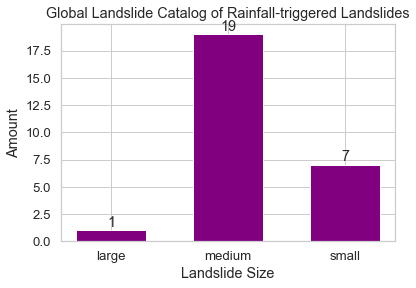

In [8]:
glc_co_gt2015.columns
#glc_co[['landslide_size', 'injury_count']]

stack_plot = []
labels = []
for i, data in glc_co_gt2015.groupby('landslide_size'):
    labels.append(i)
    stack_plot.append(data['landslide_size'].count())
    print(i, data['landslide_size'].count())

labels, stack_plot

f, ax = plt.subplots()
width = 0.6
bars = ax.bar(labels, stack_plot, width, color='purple')
ax.set(xlabel='Landslide Size',
       ylabel='Amount',
       title='Global Landslide Catalog of Rainfall-triggered Landslides')

ax.bar_label(bars, padding=1);

continuous_rain 10
downpour 13
rain 4


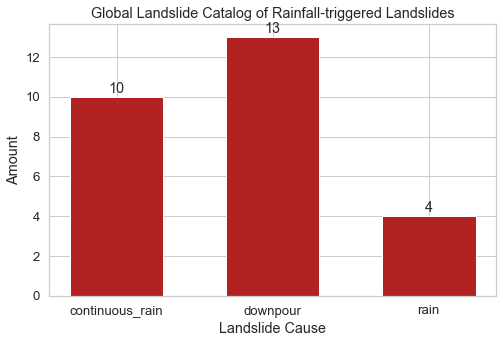

In [9]:
stack_plot = []
labels = []
for i, data in glc_co_gt2015.groupby('landslide_trigger'):
    labels.append(i)
    stack_plot.append(data['landslide_trigger'].count())
    print(i, data['landslide_trigger'].count())

labels, stack_plot

f, ax = plt.subplots(figsize=(8,5))
width = 0.6
bars = ax.bar(labels, stack_plot, width, color='firebrick')
ax.set(xlabel='Landslide Cause',
       ylabel='Amount',
       title='Global Landslide Catalog of Rainfall-triggered Landslides')

ax.bar_label(bars, padding=1);

continuous_rain 10
downpour 13
rain 4


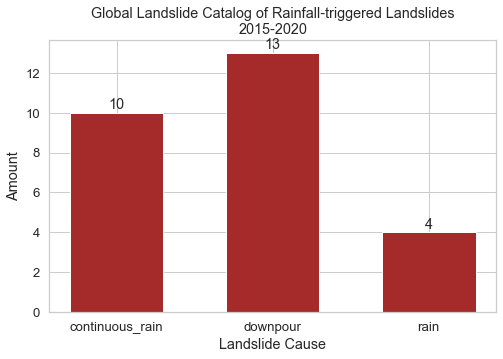

In [10]:
stack_plot = []
labels = []
for i, data in glc_co_gt2015.groupby('landslide_trigger'):
    labels.append(i)
    stack_plot.append(data['landslide_trigger'].count())
    print(i, data['landslide_trigger'].count())

labels, stack_plot

f, ax = plt.subplots(figsize=(8,5))
width = 0.6
bars = ax.bar(labels, stack_plot, width, color='brown')
ax.set(xlabel='Landslide Cause',
       ylabel='Amount',
       title='Global Landslide Catalog of Rainfall-triggered Landslides\n2015-2020')

ax.bar_label(bars, padding=1);

### Map the landslides over Colorado

In [11]:
geometry = [Point(xy) for xy in zip(
    glc_co_gt2015['longitude'], glc_co_gt2015['latitude'])]
crs = 'epsg:4326'
glc_co_epsg4326 = GeoDataFrame(glc_co_gt2015, crs=crs, geometry=geometry)

In [12]:
glc_co_epsg4326.index.min(), glc_co_epsg4326.index.max()

(Timestamp('2015-04-27 00:00:00'), Timestamp('2016-08-07 00:00:00'))

In [13]:
triggers = np.unique(glc_co_epsg4326['landslide_trigger'])
triggers

array(['continuous_rain', 'downpour', 'rain'], dtype=object)

In [14]:
# Create a symbology dictionary that maps "type" to color. 
colors = ['red', 'green', 'blue', 'orange','lightgray']
points_symb = dict(zip(triggers,colors))
points_symb

{'continuous_rain': 'red', 'downpour': 'green', 'rain': 'blue'}

In [15]:
m2 = folium.Map([39.0, -105.27], zoom_start=6, tiles='Stamen Terrain')

for i, loc in glc_co_epsg4326.iterrows():
    # print(i, loc['latitude'], loc['longitude'])
    folium.Marker(location=[loc['latitude'], loc['longitude']],
                  icon=folium.Icon(color=points_symb[loc['landslide_trigger']],
                                   prefix='glyphicon', icon='off')).add_to(m2)

# Continuous Rain
folium.CircleMarker(location=[40.5, -103], radius=10,
                    color='red',
                    fill_color='red',
                    fill_opacity=1.0).add_to(m2)
folium.Marker(
    location=[40.5, -102.7],
    icon=folium.DivIcon(
        html=f"""<b>{'Continuous Rain'}</b>""")
).add_to(m2)

# Downpour
folium.CircleMarker(location=[40, -103], radius=10,
                    color='green',
                    fill_color='green',
                    fill_opacity=1.0).add_to(m2)
folium.Marker(
    location=[40, -102.7],
    icon=folium.DivIcon(
        html=f"""<b>{'Downpour'}</b>""")
).add_to(m2)

# Rain
folium.CircleMarker(location=[39.5, -103], radius=10,
                    color='dodgerblue',
                    fill_color='dodgerblue',
                    fill_opacity=1.0).add_to(m2)
folium.Marker(
    location=[39.5, -102.7],
    icon=folium.DivIcon(
        html=f"""<b>{'Rain'}</b>""")
).add_to(m2)

       
#Add Title
title_html = 'Rainfall-triggered landslides in Colorado (2015-2020)'
m2.get_root().html.add_child(folium.Element(title_html))

m2

In [16]:
map_output = os.path.join(et.io.HOME,
                           'earth-analytics',
                           'capstone-landslides-soilmoisture', 'plots',
                           'map_landslides_sites.html')
m2.save(map_output)